<a href="https://colab.research.google.com/github/chisomobanja/metadata-classification/blob/main/metadata_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## 1.1 Problem statement
Many articles published in UNZA journals have incomplete or inconsistent descriptive metadata (e.g., missing author names, publication dates, keywords, abstracts). This makes it difficult for researchers or librarians to correctly cite articles. We need a way to automatically classify the completeness of metadata associated with each article, so we can identify gaps and improve metadata quality.

##1.2 Business Objectives


 1. Automate Metadata Completeness Classification.

 2. Diagnose Metadata Gaps Across UNZA journels.

 3. improve Citation Accuracy and Research Discoverability.

 4. Standaridise Metadata Practices.

 5. Establish Sustainable Metadata Governance.


### 1.2.1 What success might look like in real life :

  - Metadata Completeness where each article recieves a scored ranging from 0% to 100% based on the presence of key metadata.

  - Reduction in Incomplete Records where number of articles with missing metadata drops by a good percentage like 70%.


- Improved Citation Quality where there is a great reduction in citation errors by researchers and librarians.

- Metadata validation reduces manual correction workload by a great percentage.

- Metadata audits and contributor training are institutionalised in various departments.

## 1.3 Translating business objectives into data mining goals
To achieve the above business objectives, our project will focus on developing a robust classification model capable of automatically evaluating the completeness of descriptive metadata for articles in UNZA journals. Specifically:
- Build a supervised classification model that categorizes articles into defined completeness levels — for example:

  -Complete (all required metadata fields present),

  -Partially Complete (some key fields missing),

  -Incomplete (major fields missing).
- Train and validate the model using historical article metadata records, where completeness has been manually assessed, ensuring the model can generalize to new, unseen records.
- Leverage appropriate features from metadata fields such as title, author(s), publication date, keywords, abstract, DOI, and journal name to determine the completeness score/class.
- Enable metadata quality insights by aggregating classification results to identify common gaps across journals, which will guide targeted improvements and policy enforcement.
- Set measurable model performance targets — e.g., at least 85% classification accuracy for predicting completeness categories on test data.

## 1.4 Initial Project Success Criteria
We’ll know our project is successful when we can clearly see improvements in both the quality of metadata and the ease of managing it. Specifically:

1. ### Accurate classifications
   Our model should correctly predict whether an article’s metadata is complete, partially complete, or incomplete at least 85% of the time. It should also be especially reliable in spotting incomplete records, with precision and recall above 80%.

2. ### Trustworthy completeness scores
   When we compare the system’s completeness scores to manual librarian checks, the difference should be very small ideally less than 5%.

3. ### Noticeable improvement in records  
   Within a period of time, the number of articles with missing or incomplete metadata should drop by at least half in the journals we focus on.

4. ### Smooth workflow integration  
   The tool should fit into the existing UNZA journal processes without slowing things down, allowing continuous checks without extra hassle.

5. ### Positive user feedback  
   Librarians, editors, and contributors should find the tool easy to use and report that it saves them time and reduces the amount of manual fixing they have to do.


##1.5 Next Steps

To move forward, we will begin by collecting and preparing metadata samples from existing UNZA journal articles. This includes labelling records for completeness and identifying key metadata fields. We will then design and test initial classification models, refining them based on performance metrics. Parallel to model development, we’ll engage stakeholders (librarians, editors, contributors) to ensure the solution aligns with their workflows and needs. Once validated, the tool will be piloted on select journals before broader deployment.

# 2. Data Understanding


In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from datetime import datetime
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# Mount Google Drive
drive.mount('/content/drive')

# Loading the dataset the dataset using the correct path
var_dataset = pd.read_csv('/content/drive/.shortcut-targets-by-id/1BTuOqdVlsllIxOpwU9o5LGYwxkxuPLWL/misc-unza25-csc4792-project_team7/Metadata_classification_dataset - Sheet1.csv')

print(" Dataset loaded successfully!")
print(f"Shape: {var_dataset.shape}")

Mounted at /content/drive
 Dataset loaded successfully!
Shape: (259, 11)


In [2]:
var_dataset.head()

,Title,Date Published,Authors,Article_ID,Abstract,Keywords,Journal,Issue,Volume,DOI,URL
0,Politics of gender in sports administration an...,2021-06-30,Mbale G Tamela; Madalitso K Banja,JAE_001,This was a phenomenological study aimed at inv...,"Access to opportunities, gender, gender stereo...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
1,Distance education students’ experiences of in...,2021-06-30,Musonda Luchembe; Peter C Sampa; Daniel L Mpol...,JAE_002,Although informal learning is an important way...,"Informal learning, informal study group, inter...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
2,Social Cash Transfer mediating socio-economic ...,2021-06-30,Serah Kabamba; Collins C Kayangula; Noah K Sic...,JAE_003,The study aimed at investigating how community...,"Elderly, social inequality mediation, social c...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
3,Theatre for development: a creative strategy f...,2021-06-30,Brian Kombe; Emmy H Mbozi,JAE_004,This article is based on a study that sought t...,"Theatre for Development, community, Conscienti...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
4,"Youth and adult literacy in Zambia, alternativ...",2021-06-30,Choolwe Kang'ombe; Noah K Sichula,JAE_005,This qualitative exploratory article attempted...,"Adult literacy, adult literacy policy, curricu...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...


In [3]:
print(f"Shape: {var_dataset.shape}")

Shape: (259, 11)


In [4]:
print("DATASET OVERVIEW ") #Checking the names of the columns
print(f"Dataset Shape: {var_dataset.shape}")
print(f"Number of Rows: {var_dataset.shape[0]}")
print(f"Number of Columns: {var_dataset.shape[1]}")
print("\nColumn Names:")
for i, col in enumerate(var_dataset.columns, 1):
    print(f"{i}. {col}")

DATASET OVERVIEW 
Dataset Shape: (259, 11)
Number of Rows: 259
Number of Columns: 11

Column Names:
1. Title
2. Date Published
3. Authors
4. Article_ID
5. Abstract
6. Keywords
7. Journal
8. Issue
9. Volume
10. DOI
11. URL


In [5]:
var_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           259 non-null    object
 1   Date Published  258 non-null    object
 2   Authors         257 non-null    object
 3   Article_ID      259 non-null    object
 4   Abstract        257 non-null    object
 5   Keywords        240 non-null    object
 6   Journal         259 non-null    object
 7   Issue           259 non-null    int64 
 8   Volume          259 non-null    int64 
 9   DOI             52 non-null     object
 10  URL             259 non-null    object
dtypes: int64(2), object(9)
memory usage: 22.4+ KB


In [6]:
var_dataset.describe(include='all') #Descriptive statistics

,Title,Date Published,Authors,Article_ID,Abstract,Keywords,Journal,Issue,Volume,DOI,URL
count,259,258,257,259,257,240,259,259.000000,259.000000,52,259
unique,257,94,252,259,257,240,14,NaN,NaN,52,259
top,EDITORIAL COMMENT,2023-08-09,Cheela Chilala,ZJOCI_025,In exploring agency and phenomenology in the f...,"Access to opportunities, gender, gender stereo...",Multidisciplinary Journal of Language and Soci...,NaN,NaN,https://doi.org/10.53974/unza.jabs.9.2.1399,https://journals.unza.zm/index.php/ZJOCI/artic...
freq,2,16,2,1,1,1,25,NaN,NaN,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.957529,6.841699,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.432651,7.289291,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,7.000000,NaN,NaN


In [7]:
print("DATA QUALITY ANALYSIS")
print("\n This is an analysis of missing values:")

missing_data = var_dataset.isnull().sum()
missing_percentage = (missing_data / len(var_dataset)) * 100

quality_df = pd.DataFrame({
    'Column': var_dataset.columns,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print(quality_df.to_string(index=False))

DATA QUALITY ANALYSIS

 This is an analysis of missing values:
        Column  Missing_Count  Missing_Percentage
           DOI            207           79.922780
      Keywords             19            7.335907
       Authors              2            0.772201
      Abstract              2            0.772201
Date Published              1            0.386100
         Title              0            0.000000
    Article_ID              0            0.000000
       Journal              0            0.000000
         Issue              0            0.000000
        Volume              0            0.000000
           URL              0            0.000000


The dataset 259 academic articles with 11 columns including titles, abstracts, authors, and journal metadata. The missing data is mostly in the DOI's and Keywords with a few missing in 3 other categories. Other than that, the dataset does not have many many missing values.

In [8]:
print ("This show a sample of the dataset giving out 10 randomly picked articles")

var_dataset.sample(10)

This show a sample of the dataset giving out 10 randomly picked articles


,Title,Date Published,Authors,Article_ID,Abstract,Keywords,Journal,Issue,Volume,DOI,URL
251,INTERMINABLE VIRGINS IN A RUSTING COUNTRY? THE...,2023-08-09,Gankhanani Moffat Moyo; Bether Mwale Moyo,ZJOCI_018,This article examined two songs: We Will Dance...,"Conceptual Metaphor, Poetry, COVID-19, Quarant...",ZANGO: Zambian Journal of Contemporary Issues,1,34,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...
217,Nkolola Initiation Rite in Munyumbe Chiefdom o...,2023-08-09,Conard Habamba; Austin M. Cheyeka,ZJRCI_012,"Conducted in 2020, this study explored reasons...","Decline, Nkolola Initiation Practice, Tonga Pe...",Zambia Journal of Religion and Contemporary Is...,1,12,NaN,https://journals.unza.zm/index.php/ZJRCI/artic...
16,The adult learning environment,2019-06-11,Wanga W Chakanika; Noah K Sichula; Phyllis I S...,JAE_017,This article examines some aspects of a learni...,NaN,Journal of Adult Education,1,1,NaN,https://journals.unza.zm/index.php/JAE/article...
219,Stakeholders' Perceptions on the National Heri...,2023-08-09,Kenny Changwe; Tomaida L.C Milingo,ZJRCI_014,The study explored the stakeholders’ perceptio...,"Heritage, Preservation, Management, Policies, ...",Zambia Journal of Religion and Contemporary Is...,1,12,NaN,https://journals.unza.zm/index.php/ZJRCI/artic...
69,The Role of Home Literacy Environment and Oral...,2023-11-17,Janet Serenje; Beatrice Matafwali; Mubanga Mof...,jlt_017,The home literacy environment and children's o...,"Home literacy environment, oral language, rhym...",Journal of Lexicography and Terminology,1,7,NaN,https://journals.unza.zm/index.php/jlt/article...
112,Rapid Smartphone-based Image Reading for Asses...,2022-12-11,James Nyirenda,JONAS_010,Third world countries suffer from supply of su...,"Thin layer Chromatography, Smartphone Detector...",Journal of Natural and Applied Sciences,1,6,https://doi.org/10.53974/unza.jonas.6.1.743,https://journals.unza.zm/index.php/JONAS/artic...
36,Some Novels are Novels While Others are Not: C...,2025-01-10,Gankhanani Moffat Moyo; Stewart Crehan,JLSS_002,This article aims at investigating whether or ...,"Novelness, African novel, Heteroglossia, Carni...",Journal of Law and Social Sciences,2,33,https://doi.org/10.53974/unza.jlss.6.2.1297,https://journals.unza.zm/index.php/JLSS/articl...
46,Municipal Solid Waste Management: An Assessmen...,19 March 2010,Kachikoti Banda; Erastus Mwanaumo; Bupe Mwanza,JLSS_012,Governance mechanisms for Municipal Solid Wast...,"Frameworks, Governance, management, municipal,...",Journal of Law and Social Sciences,2,8,https://doi.org/10.53974/unza.jlss.6.1.1204,https://journals.unza.zm/index.php/JLSS/articl...
234,MANTIMBWA AND MTYANGALA: MUSICAL BOWS PLAYED B...,1 OF 2024,Bibian Kalinde,ZJOCI_001,"In many cultures, musical instruments are used...","Bows, Chewa, Matimbwa, Mtyangala, Tonga, Tumbu...",ZANGO: Zambian Journal of Contemporary Issues,1,1,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...
150,Attitudes of Pre-Service and In-Service Teache...,2020-11-20,Bornwell Katebe,ZIJE_011,To establish whether there are differences in ...,"Stuttering, Teachers’ Attitudes, Students Who ...",Zambia Interdisciplinary Journal of Education,1,1,NaN,https://journals.unza.zm/index.php/ZIJE/articl...


In [9]:
print('This shows the last five entries in the data set ')
var_dataset.tail()

This shows the last five entries in the data set 


,Title,Date Published,Authors,Article_ID,Abstract,Keywords,Journal,Issue,Volume,DOI,URL
254,MATERIAL NARRATION OF NOSTALGIA AND MODALITY I...,2023-08-09,Hambaba Jimaima; Gabriel Simungala; Trevor Mwansa,ZJOCI_021,Conflating the theoretical ‘givings’ of modali...,"Affect, Modality, Memory, Nostalgia, Reimaging...",ZANGO: Zambian Journal of Contemporary Issues,2,34,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...
255,THE FIGURATIVE LANGUAGE OF SEXUAL PERFORMANCE:...,2023-08-09,Charity Khondowe; Gankhanani Moffat Moyo,ZJOCI_022,Abstract This article examined the figurative ...,"Figurative Analysis, Cinamwali Sexual Performa...",ZANGO: Zambian Journal of Contemporary Issues,2,34,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...
256,RESEMIOTISATION AND INTERTEXTUALITY IN MUSICAL...,2023-08-09,Gabriel Simungala; Hambaba Jimaima; Trevor Mwansa,ZJOCI_023,"We draw on ‘Dununa Reverse’, the Patriotic Fro...","Patriotic Front, Musicology, Campaign Song, Za...",ZANGO: Zambian Journal of Contemporary Issues,2,34,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...
257,"INTERROGATING MOSES SAKALA’S FUNERAL SONG, ‘CH...",2023-08-09,Naomi Njobvu; Kelvin Mambwe; Hambaba Jimaima,ZJOCI_024,Funeral songs are a type of discourse commonly...,"Funeral Song, Discourse Analysis, Music, Pain,...",ZANGO: Zambian Journal of Contemporary Issues,2,34,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...
258,DICTION AND SYMBOLISM IN SISTA D’S VITENDENI: ...,2023-08-09,Hambaba Jimaima; Naomi Njobvu,ZJOCI_025,In exploring agency and phenomenology in the f...,"Agency, Diction, Phenomenology, Semiotics, Sym...",ZANGO: Zambian Journal of Contemporary Issues,2,34,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...


In [10]:
var_dataset.dtypes

,0
Title,object
Date Published,object
Authors,object
Article_ID,object
Abstract,object
Keywords,object
Journal,object
Issue,int64
Volume,int64
DOI,object


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

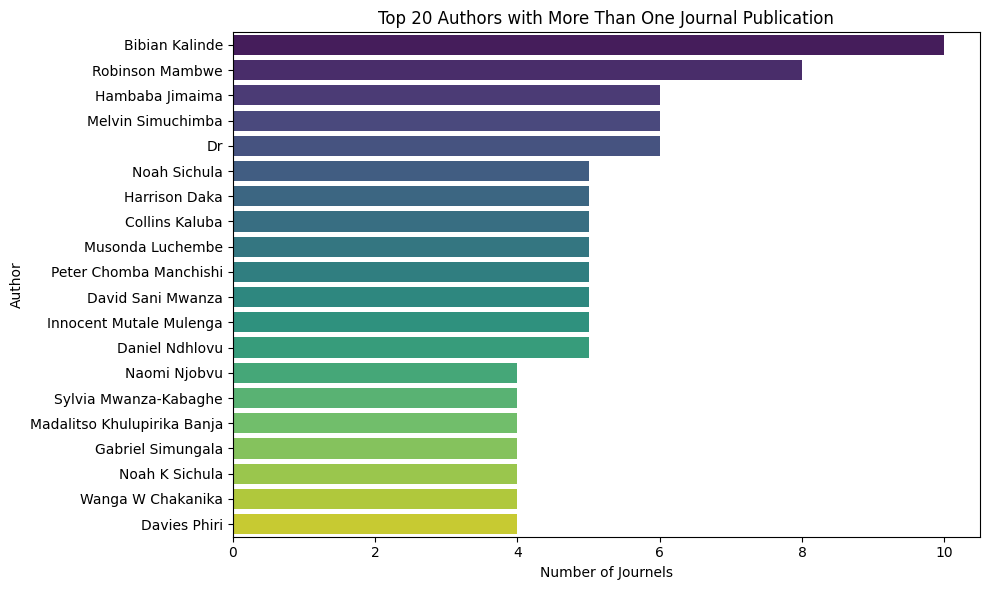

In [12]:
from collections import Counter


# Split authors using semicolon or comma
authors_list = var_dataset['Authors'].dropna().str.split(';|,').sum()

# Clean whitespace and remove empty strings
authors_list = [a.strip() for a in authors_list if a.strip() != ""]

# Count author frequencies
author_counts = Counter(authors_list)

# Filter authors with more than one publication
filtered_authors = {author: count for author, count in author_counts.items() if count > 1}

# Convert to DataFrame and sort
top_authors = pd.DataFrame(filtered_authors.items(), columns=['author', 'num_Journel'])
top_authors = top_authors.sort_values(by='num_Journel', ascending=False)

top_authors = top_authors.head(20)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_authors, x='num_Journel', y='author', palette='viridis')
plt.title("Top 20 Authors with More Than One Journal Publication")
plt.xlabel("Number of Journels")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

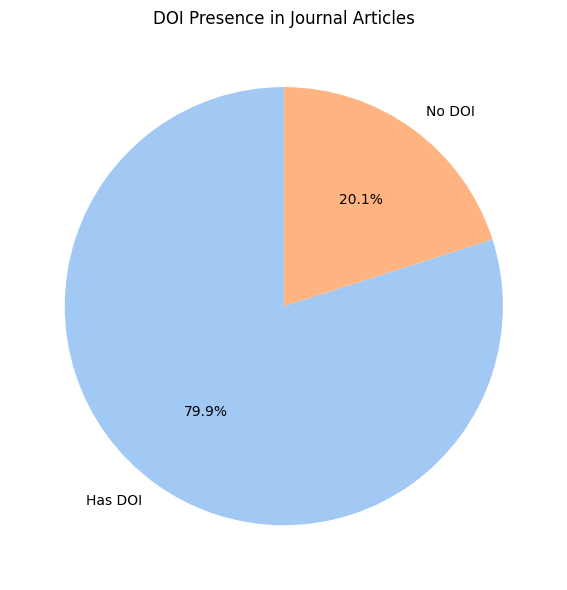

In [13]:


# Check for valid DOIs (non-null and non-empty)
has_doi = var_dataset['DOI'].notna() & (var_dataset['DOI'].astype(str).str.strip() != '')
doi_counts = has_doi.value_counts()

# Prepare labels and colors
labels = ['Has DOI', 'No DOI']
colors = sns.color_palette('pastel')[0:2]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(doi_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('DOI Presence in Journal Articles')
plt.tight_layout()
plt.show()


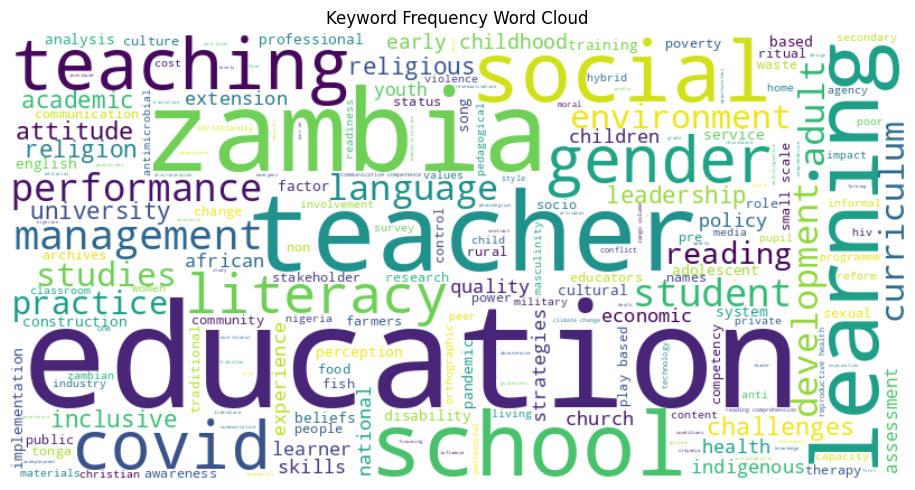

In [14]:
from wordcloud import WordCloud

# Combine all keywords into one string
keywords_text = var_dataset['Keywords'].dropna().astype(str).str.lower().str.cat(sep=';')

# Split and clean
keywords_list = [kw.strip() for kw in keywords_text.split(';') if kw.strip() != '']
keywords_string = ' '.join(keywords_list)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(keywords_string)

# Plot
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Frequency Word Cloud')
plt.tight_layout()
plt.show()


###Publication Year Distribution (Histogram / Line Plot)




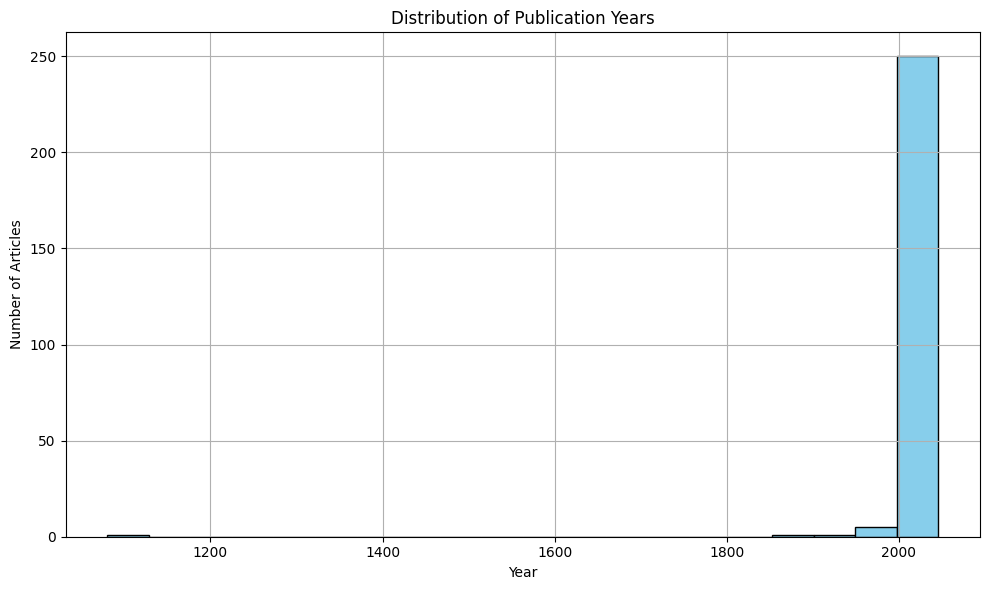

In [15]:
import matplotlib.pyplot as plt

# Extract year from 'Date Published' column and handle potential errors
# Convert to numeric, coercing errors to NaN, then drop NaNs
var_dataset['Year'] = pd.to_numeric(var_dataset['Date Published'].str.extract(r'(\d{4})', expand=False), errors='coerce')

plt.figure(figsize=(10,6))
var_dataset['Year'].dropna().astype(int).hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

What it does: Shows how many articles were published in each year.

Why useful: Helps spot publication trends over time (e.g., growth or decline of journal outputs).

###Articles per Journal (Bar Chart – Top 15)

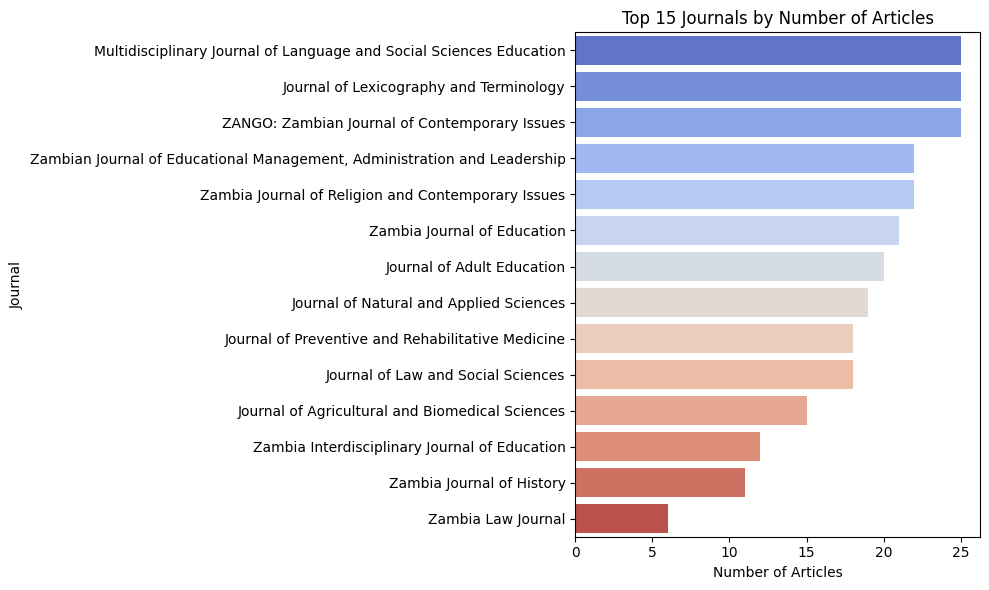

In [16]:
top_journals = var_dataset['Journal'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette='coolwarm')
plt.title('Top 15 Journals by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Journal')
plt.tight_layout()
plt.show()


What it does: Displays the journals with the highest number of articles in the dataset.

Why useful: Highlights which journals are the most active or most represented in UNZA publications.

###Articles per Author Count (Histogram of Collaboration)

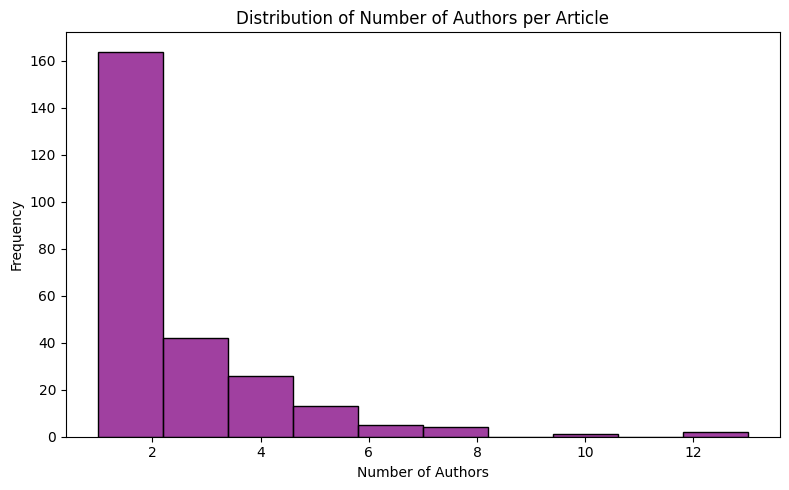

In [17]:
author_counts_per_paper = var_dataset['Authors'].dropna().apply(lambda x: len(x.split(';')))
plt.figure(figsize=(8,5))
sns.histplot(author_counts_per_paper, bins=10, kde=False, color='purple')
plt.title('Distribution of Number of Authors per Article')
plt.xlabel('Number of Authors')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


What it does: Plots the distribution of how many authors contributed to each article.

Why useful: Gives insight into collaboration patterns — whether research is mostly single-authored or team-based.

###Abstract Length Distribution (Histogram)

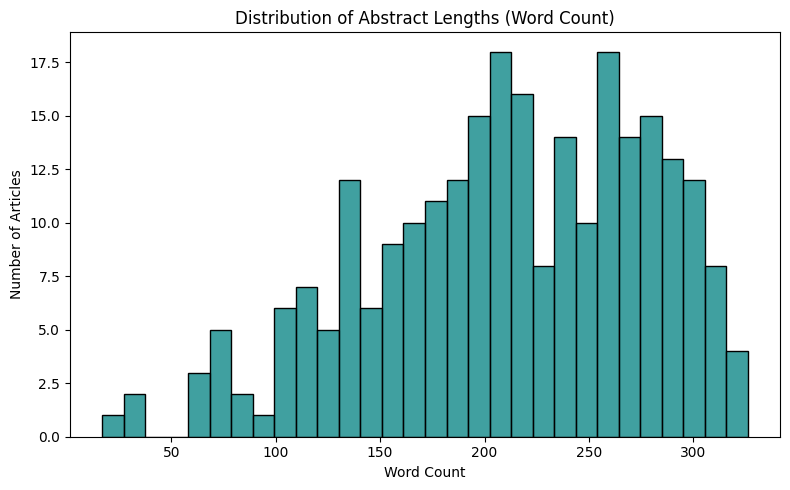

In [18]:
abstract_lengths = var_dataset['Abstract'].dropna().apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.histplot(abstract_lengths, bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Abstract Lengths (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()



What it does: Measures how long abstracts are (in word counts).

Why useful: Identifies consistency of abstracts. For example, very short abstracts might indicate incomplete metadata.

###Missing Values Heatmap

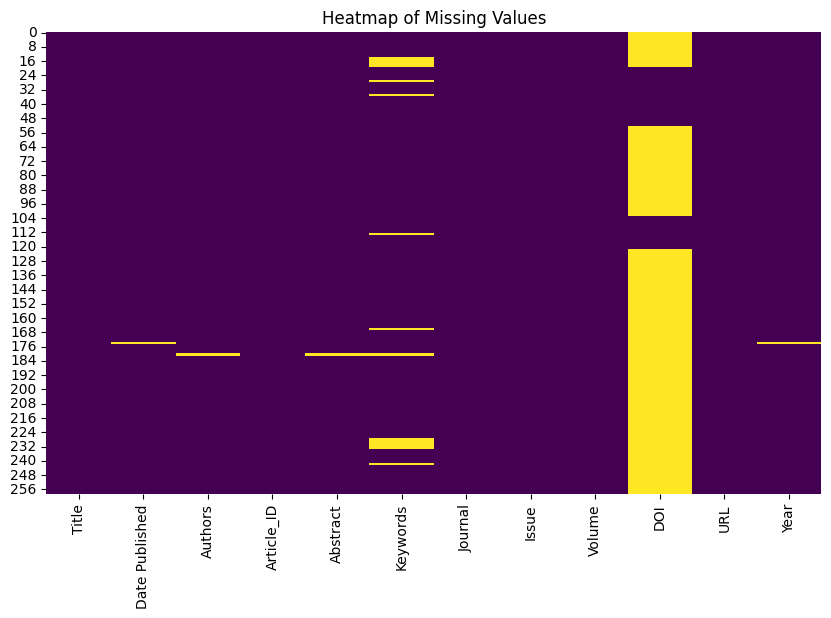

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(var_dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


What it does: Visually marks missing values in the dataset with a heatmap.

Why useful: Quickly shows which fields (columns) have the most missing data, helping focus on data cleaning and metadata completeness.

###Correlation Heatmap (Numerical Columns Only)

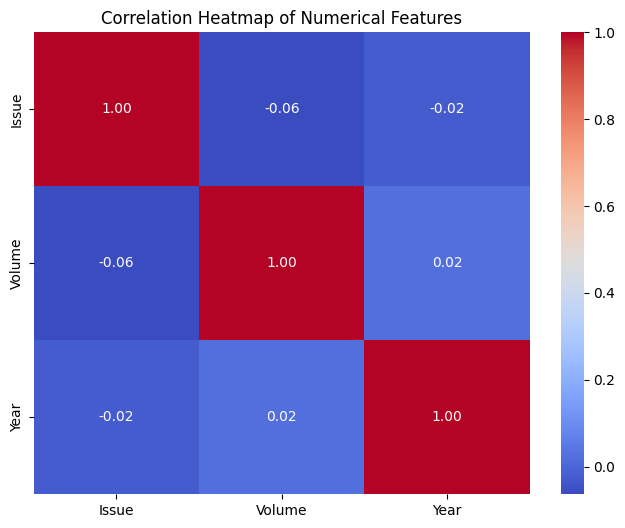

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(var_dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


What it does: Shows the correlation (relationship strength) between numerical attributes.

Why useful: Helps detect whether any numerical features are related, which may influence model design or feature engineering.

# 3. Data Preparation

## Data cleaning

In [21]:
# Create a working copy of the dataset just to avoid affecting the actual dataset
df = var_dataset.copy()
print(f"Original dataset shape: {df.shape}")

Original dataset shape: (259, 12)


Showing the initial issues that we had from the data analysis

In [22]:

initial_quality = {
    'total_records': len(df),
    'missing_doi': df['DOI'].isnull().sum(),
    'missing_keywords': df['Keywords'].isnull().sum(),
    'missing_authors': df['Authors'].isnull().sum(),
    'missing_abstract': df['Abstract'].isnull().sum(),
    'missing_date': df['Date Published'].isnull().sum()
}

print("\nInitial Data Quality Issues:")
for issue, count in initial_quality.items():
    if count > 0 and issue != 'total_records':
        percentage = (count / initial_quality['total_records']) * 100
        print(f"- {issue}: {count} ({percentage:.2f}%)")







Initial Data Quality Issues:
- missing_doi: 207 (79.92%)
- missing_keywords: 19 (7.34%)
- missing_authors: 2 (0.77%)
- missing_abstract: 2 (0.77%)
- missing_date: 1 (0.39%)


### 3.1.2 Handling Missing Values

####Made the decisions to:
#####a. Keep missing DOI's as Nan as the high missing rate suggests they are not heavily required
##### b. Fill the missing keywords with a standardised placeholder
##### c. Handle missing author information after investigation
##### d. Handle missing abstracts
##### e. Handle missing and inconsistent dates

In [23]:
# Strategy 1: DOI - Keep missing as NaN since 79.92% are missing and thats like most of the dataset
print("\n1. DOI Analysis:")
doi_missing = df['DOI'].isnull().sum()
print(f"Missing DOIs: {doi_missing} out of {len(df)} ({(doi_missing/len(df))*100:.1f}%)")



print("\n2. Keyword Analysis:")
keywords_missing = df['Keywords'].isnull().sum()
print(f"Missing Keywords: {keywords_missing} out of {len(df)} ({(keywords_missing/len(df))*100:.1f}%)")

# Fill missing keywords with a standardized placeholder
df['Keywords'] = df['Keywords'].fillna('No keywords provided')
print("Decision: Filled missing keywords with 'No keywords provided'")

# Strategy 3: Authors - Investigate and handle missing author information
print("\n3. Authors Field Analysis:")
authors_missing = df['Authors'].isnull().sum()
print(f"Missing Authors: {authors_missing} out of {len(df)} ({(authors_missing/len(df))*100:.1f}%)")

# Check which articles have missing authors
if authors_missing > 0:
    missing_authors_articles = df[df['Authors'].isnull()][['Article_ID', 'Title', 'Journal']]
    print("Articles with missing authors:")
    print(missing_authors_articles.to_string(index=False))

# Fill missing authors
df['Authors'] = df['Authors'].fillna('Author not specified')
print("Decision: Filled missing authors with 'Author not specified'")

# Strategy 4: Abstract - Handle missing abstracts
print("\n4. Abstract Field Analysis:")
abstract_missing = df['Abstract'].isnull().sum()
print(f"Missing Abstracts: {abstract_missing} out of {len(df)} ({(abstract_missing/len(df))*100:.1f}%)")

if abstract_missing > 0:
    missing_abstract_articles = df[df['Abstract'].isnull()][['Article_ID', 'Title', 'Journal']]
    print("Articles with missing abstracts:")
    print(missing_abstract_articles.to_string(index=False))

# For missing abstracts, use title as fallback content
df['Abstract'] = df.apply(lambda row:
    row['Title'] if pd.isnull(row['Abstract']) else row['Abstract'], axis=1)
print("Decision: Used article title as fallback for missing abstracts")

# Strategy 5: Date Published - Handle missing and inconsistent dates
print("\n5. Date Published Field Analysis:")
date_missing = df['Date Published'].isnull().sum()
print(f"Missing Dates: {date_missing} out of {len(df)} ({(date_missing/len(df))*100:.1f}%)")

# Check for date format inconsistencies
if date_missing > 0:
    missing_date_articles = df[df['Date Published'].isnull()][['Article_ID', 'Title', 'Journal']]
    print("Articles with missing dates:")
    print(missing_date_articles.to_string(index=False))

# Fill missing dates with a placeholder that indicates unknown
df['Date Published'] = df['Date Published'].fillna('Date not available')
print("Decision: Filled missing dates with 'Date not available'")



1. DOI Analysis:
Missing DOIs: 207 out of 259 (79.9%)

2. Keyword Analysis:
Missing Keywords: 19 out of 259 (7.3%)
Decision: Filled missing keywords with 'No keywords provided'

3. Authors Field Analysis:
Missing Authors: 2 out of 259 (0.8%)
Articles with missing authors:
Article_ID             Title                                                                  Journal
ZJEMAL_008        Cover Page Zambian Journal of Educational Management, Administration and Leadership
ZJEMAL_009 Table of Contents Zambian Journal of Educational Management, Administration and Leadership
Decision: Filled missing authors with 'Author not specified'

4. Abstract Field Analysis:
Missing Abstracts: 2 out of 259 (0.8%)
Articles with missing abstracts:
Article_ID             Title                                                                  Journal
ZJEMAL_008        Cover Page Zambian Journal of Educational Management, Administration and Leadership
ZJEMAL_009 Table of Contents Zambian Journal of Educat

### 3.1.3 Standardizing Date Formats

In [24]:
def clean_and_standardize_date_enhanced(date_str):
    """
    Enhanced date cleaning function to handle more problematic formats

    Handles formats like:
    - 2021-06-30 (standard ISO)
    - 2 OF 2023, 14 of 2009
    - 9 March 2025
    - 00 and 2020
    - 10 to 2020 (NEW)
    - 66 to 2014 (NEW)
    - Article 4 2016 (NEW)
    - 9 DOI 1080 (NEW - likely corrupted)
    - number 3 1974 (NEW)
    """
    if pd.isnull(date_str) or str(date_str).strip() == '' or date_str == 'Date not available':
        return 'Date not available'

    date_str = str(date_str).strip()

    try:
        # Try standard ISO format first (YYYY-MM-DD)
        parsed_date = pd.to_datetime(date_str, errors='raise')
        return parsed_date.strftime('%Y-%m-%d')
    except:
        try:
            # Handle "X OF YYYY" or "X of YYYY" format
            if ' OF ' in date_str.upper() or ' of ' in date_str:
                year_match = re.search(r'(\d{4})', date_str)
                if year_match:
                    year = year_match.group(1)
                    return f"{year}-01-01"

            # Handle "X to YYYY" format (e.g., "10 to 2020", "66 to 2014")
            if ' to ' in date_str.lower():
                year_match = re.search(r'(\d{4})', date_str)
                if year_match:
                    year = year_match.group(1)
                    return f"{year}-01-01"

            # Handle "Article X YYYY" format (e.g., "Article 4 2016")
            if 'article' in date_str.lower():
                year_match = re.search(r'(\d{4})', date_str)
                if year_match:
                    year = year_match.group(1)
                    return f"{year}-01-01"

            # Handle "number X YYYY" format (e.g., "number 3 1974")
            if 'number' in date_str.lower():
                year_match = re.search(r'(\d{4})', date_str)
                if year_match:
                    year = year_match.group(1)
                    return f"{year}-01-01"

            # Handle corrupted formats with "DOI" (e.g., "9 DOI 1080")
            # This seems to be corrupted data - extract any 4-digit number that could be a year
            if 'doi' in date_str.lower():
                # Look for 4-digit numbers that could be years (1900-2030)
                year_matches = re.findall(r'(\d{4})', date_str)
                for year in year_matches:
                    year_int = int(year)
                    if 1900 <= year_int <= 2030:
                        return f"{year}-01-01"
                # If no valid year found, mark as corrupted
                return f"Corrupted date format: {date_str}"

            # Handle "DD Month YYYY" format (e.g., "9 March 2025")
            month_names = ['January', 'February', 'March', 'April', 'May', 'June',
                          'July', 'August', 'September', 'October', 'November', 'December']
            if any(month in date_str for month in month_names):
                parsed_date = pd.to_datetime(date_str, errors='raise')
                return parsed_date.strftime('%Y-%m-%d')

            # Handle "XX and YYYY" format (e.g., "00 and 2020")
            if ' and ' in date_str:
                year_match = re.search(r'(\d{4})', date_str)
                if year_match:
                    year = year_match.group(1)
                    return f"{year}-01-01"

            # Final attempt: extract any 4-digit year between 1900-2030
            year_matches = re.findall(r'(\d{4})', date_str)
            for year in year_matches:
                year_int = int(year)
                if 1900 <= year_int <= 2030:
                    return f"{year}-01-01"

            # If all else fails, return as invalid
            return f"Invalid date format: {date_str}"

        except Exception as e:
            return f"Invalid date format: {date_str}"

# Apply the enhanced date cleaning
df['Date_Published_Clean'] = df['Date Published'].apply(clean_and_standardize_date_enhanced)

# Analyze enhanced cleaning results
print("Enhanced Date Cleaning Results:")

# Count successful standardizations
successful_dates = len(df[~df['Date_Published_Clean'].str.contains('Invalid date|Corrupted date|Date not available', na=False)])
corrupted_dates = len(df[df['Date_Published_Clean'].str.contains('Corrupted date', na=False)])
invalid_dates = len(df[df['Date_Published_Clean'].str.contains('Invalid date', na=False)])
missing_dates = len(df[df['Date_Published_Clean'] == 'Date not available'])

print(f"Successfully standardized dates: {successful_dates}")
print(f"Corrupted date formats (year extracted): {corrupted_dates}")
print(f"Invalid date formats (no year found): {invalid_dates}")
print(f"Missing dates: {missing_dates}")

# This part shows examples of remaining problematic dates
if invalid_dates > 0 or corrupted_dates > 0:
    print("\nRemaining problematic date examples:")
    problematic_examples = df[df['Date_Published_Clean'].str.contains('Invalid date|Corrupted date', na=False)]
    print(problematic_examples[['Article_ID', 'Date Published', 'Date_Published_Clean']].head(10))

# This shows some examples of successfully cleaned problematic dates
print("\nExamples of newly cleaned dates:")
newly_cleaned = df[
    (df['Date Published'].str.contains('to |Article |number |DOI', na=False)) &
    (~df['Date_Published_Clean'].str.contains('Invalid|Corrupted', na=False))
]
if len(newly_cleaned) > 0:
    print(newly_cleaned[['Article_ID', 'Date Published', 'Date_Published_Clean']].head())

# This is the final cleaning summary
total_processed = len(df)
success_rate = (successful_dates / total_processed) * 100
print(f"\nFinal date cleaning success rate: {success_rate:.1f}% ({successful_dates}/{total_processed})")

# Just incase there's any difficult date, I will come back to it(So this is temporary, I hope. Please one of you remind me if I forget
if invalid_dates > 0:
    print(f"\nNote: {invalid_dates} dates still need manual review or can be set to a default value")
    print("Consider setting these to 'Unknown publication date' for the classification model")

Enhanced Date Cleaning Results:
Successfully standardized dates: 256
Corrupted date formats (year extracted): 1
Invalid date formats (no year found): 1
Missing dates: 1

Remaining problematic date examples:
    Article_ID Date Published               Date_Published_Clean
33    JABS_014     9 DOI 1080  Corrupted date format: 9 DOI 1080
162   ZAJE_011    44 AND 2046   Invalid date format: 44 AND 2046

Examples of newly cleaned dates:
    Article_ID  Date Published Date_Published_Clean
6      JAE_007      10 to 2020           2020-01-01
9      JAE_010      66 to 2014           2014-01-01
30    JABS_011  Article 4 2016           2016-01-01
37    JLSS_003   number 3 1974           1974-01-01
114  JONAS_012      00 to 2020           2020-01-01

Final date cleaning success rate: 98.8% (256/259)

Note: 1 dates still need manual review or can be set to a default value
Consider setting these to 'Unknown publication date' for the classification model


In [25]:
df.columns
df.shape

(259, 13)

Handled problematic dates

In [26]:
# Check how many problematic dates we still have
problematic_dates = df[df['Date_Published_Clean'].str.contains('Invalid|Corrupted', na=False)]
print(f"Problematic dates remaining: {len(problematic_dates)}")
print("\nExamples:")
print(problematic_dates[['Article_ID', 'Date Published', 'Date_Published_Clean']].head())

# Decision: Set these to a default value or extract any usable year
df.loc[df['Date_Published_Clean'].str.contains('Invalid|Corrupted', na=False), 'Date_Published_Clean'] = 'Unknown publication date'


Problematic dates remaining: 2

Examples:
    Article_ID Date Published               Date_Published_Clean
33    JABS_014     9 DOI 1080  Corrupted date format: 9 DOI 1080
162   ZAJE_011    44 AND 2046   Invalid date format: 44 AND 2046


In [27]:
df.shape
df.head(1)

,Title,Date Published,Authors,Article_ID,Abstract,Keywords,Journal,Issue,Volume,DOI,URL,Year,Date_Published_Clean
0,Politics of gender in sports administration an...,2021-06-30,Mbale G Tamela; Madalitso K Banja,JAE_001,This was a phenomenological study aimed at inv...,"Access to opportunities, gender, gender stereo...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...,2021.0,2021-06-30


 Handle Missing Values in Issue/Volume Before Numeric Conversion


In [28]:
# Check missing values in Issue and Volume
print("Issue missing values:", df['Issue'].isnull().sum())
print("Volume missing values:", df['Volume'].isnull().sum())

# Fill missing values before converting to numeric (your feature engineering code will break otherwise)
df['Issue'] = df['Issue'].fillna('Not specified')
df['Volume'] = df['Volume'].fillna('Not specified')


Issue missing values: 0
Volume missing values: 0


Final Data Validation Check


In [29]:
print("=== FINAL DATA CLEANING VALIDATION ===")
print(f"Dataset shape: {df.shape}")
print("\nMissing values after all cleaning:")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

print("\nData types:")
print(df.dtypes)

print(f"\nTotal records: {len(df)}")
print("Data cleaning complete ✓")


=== FINAL DATA CLEANING VALIDATION ===
Dataset shape: (259, 13)

Missing values after all cleaning:
DOI     207
Year      1
dtype: int64

Data types:
Title                    object
Date Published           object
Authors                  object
Article_ID               object
Abstract                 object
Keywords                 object
Journal                  object
Issue                     int64
Volume                    int64
DOI                      object
URL                      object
Year                    float64
Date_Published_Clean     object
dtype: object

Total records: 259
Data cleaning complete ✓


 Create a Clean Dataset Flag


In [30]:
# Mark records as clean
df['is_data_clean'] = True

# Save cleaned dataset
df.to_csv('UNZA_Complete_Dataset_CLEANED.csv', index=False)
print("Cleaned dataset saved!")


Cleaned dataset saved!


#3.2 Feature engineering

In [31]:
import pandas as pd
import numpy as np

df['title_length'] = df['Title'].astype(str).apply(len)
df['abstract_length'] = df['Abstract'].astype(str).apply(len)
df['num_words_abstract'] = df['Abstract'].astype(str).apply(lambda x: len(x.split()))

print("=== Title & Abstract Features ===")
print(df[['Title', 'title_length', 'abstract_length', 'num_words_abstract']].head(10))

=== Title & Abstract Features ===
                                               Title  title_length  \
0  Politics of gender in sports administration an...            68   
1  Distance education students’ experiences of in...            85   
2  Social Cash Transfer mediating socio-economic ...            79   
3  Theatre for development: a creative strategy f...           107   
4  Youth and adult literacy in Zambia, alternativ...           126   
5  Work experiences of adult educators during the...           159   
6  Financing youth and adult literacy learning in...           139   
7  Key gender issues in the military education in...           110   
8  University Extension Education as a tool for S...           126   
9  The itinerant nature of university extension e...           148   

   abstract_length  num_words_abstract  
0             1232                 172  
1             1999                 290  
2             1365                 210  
3             1837             

In [32]:
# Keywords
df['Keywords'] = df['Keywords'].fillna("No keywords provided")
df['num_keywords'] = df['Keywords'].apply(lambda x: 0 if x == "No keywords provided" else len(x.split(',')))

# 2. Keywords features
print("\n=== Keywords Features ===")
print(df[['Keywords', 'num_keywords']].head(10))


=== Keywords Features ===
                                            Keywords  num_keywords
0  Access to opportunities, gender, gender stereo...             5
1  Informal learning, informal study group, inter...             3
2  Elderly, social inequality mediation, social c...             5
3  Theatre for Development, community, Conscienti...             4
4  Adult literacy, adult literacy policy, curricu...             5
5  Adult education, adult educators, emergency re...             5
6  Adult literacy Education  Financing  Indust...             1
7  Adult EducationContinuing Professional Educat...             1
8  Adult educationExtension educationExtra-mura...             1
9  Adult education and extension studies, Univers...             6


In [33]:
# Authors feature engineering (semicolon separator)
df['Authors'] = df['Authors'].fillna("Author not specified")

# Count authors by splitting on ';'
df['author_count'] = df['Authors'].apply(lambda x: len(str(x).split(';')) if x != "Author not specified" else 0)

# Extract first author (before first ';')
df['first_author'] = df['Authors'].apply(lambda x: str(x).split(';')[0].strip() if x != "Author not specified" else "Unknown")


# 3. Author features
print("\n=== Author Features ===")
print(df[['Authors', 'author_count', 'first_author']].head(10))



=== Author Features ===
                                             Authors  author_count  \
0                  Mbale G Tamela; Madalitso K Banja             2   
1  Musonda Luchembe; Peter C Sampa; Daniel L Mpol...             3   
2  Serah Kabamba; Collins C Kayangula; Noah K Sic...             3   
3                          Brian Kombe; Emmy H Mbozi             2   
4                  Choolwe Kang'ombe; Noah K Sichula             2   
5  Noah K Sichula; Moses Changala; Musonda Luchem...            10   
6                                 Noah Kenny Sichula             1   
7                    Paul Akpomuje; Olutoyin Mejiuni             2   
8  Stabile N Ngambi; Nelson Sakala; Davies Phiri;...             5   
9  Phillip K Mwansa; Oswell Chakulimba; Wanga W C...             3   

         first_author  
0      Mbale G Tamela  
1    Musonda Luchembe  
2       Serah Kabamba  
3         Brian Kombe  
4   Choolwe Kang'ombe  
5      Noah K Sichula  
6  Noah Kenny Sichula  
7       Paul

In [34]:
# Date Published (using cleaned column your friend made)
df['year'] = pd.to_datetime(df['Date_Published_Clean'], errors='coerce').dt.year
df['decade'] = (df['year'] // 10) * 10

# 4. Date features
print("\n=== Date Features ===")
print(df[['Date_Published_Clean', 'year', 'decade']].head(10))


=== Date Features ===
  Date_Published_Clean    year  decade
0           2021-06-30  2021.0  2020.0
1           2021-06-30  2021.0  2020.0
2           2021-06-30  2021.0  2020.0
3           2021-06-30  2021.0  2020.0
4           2021-06-30  2021.0  2020.0
5           2021-06-30  2021.0  2020.0
6           2020-01-01  2020.0  2020.0
7           2014-08-03  2014.0  2010.0
8           2019-11-16  2019.0  2010.0
9           2014-01-01  2014.0  2010.0


In [35]:
# Issue & Volume
df['issue_numeric'] = pd.to_numeric(df['Issue'], errors='coerce')
df['volume_numeric'] = pd.to_numeric(df['Volume'], errors='coerce')
df['has_issue'] = df['Issue'].notna().astype(int)
df['has_volume'] = df['Volume'].notna().astype(int)

# 5. Issue & Volume features
print("\n=== Issue & Volume Features ===")
print(df[['Issue', 'Volume', 'issue_numeric', 'volume_numeric', 'has_issue', 'has_volume']].head(10))


=== Issue & Volume Features ===
   Issue  Volume  issue_numeric  volume_numeric  has_issue  has_volume
0      2       2              2               2          1           1
1      2       2              2               2          1           1
2      2       2              2               2          1           1
3      2       2              2               2          1           1
4      2       2              2               2          1           1
5      2       2              2               2          1           1
6     82       2             82               2          1           1
7     34       2             34               2          1           1
8      1       2              1               2          1           1
9      2       1              2               1          1           1


In [36]:
# DOI
df['has_doi'] = df['DOI'].notna().astype(int)

# 6. DOI features
print("\n=== DOI Features ===")
print(df[['DOI', 'has_doi']].head(10))


=== DOI Features ===
   DOI  has_doi
0  NaN        0
1  NaN        0
2  NaN        0
3  NaN        0
4  NaN        0
5  NaN        0
6  NaN        0
7  NaN        0
8  NaN        0
9  NaN        0


###3.3 Data Transformation

3.3.1 Scaling Numerical Values

In [37]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['title_length', 'abstract_length', 'author_count']
scaler = StandardScaler()
num_scaled = scaler.fit_transform(df[numerical_cols])

# Optional: convert to DataFrame for inspection
num_scaled_df = pd.DataFrame(num_scaled, columns=[col + '_scaled' for col in numerical_cols])
print (num_scaled_df)

     title_length_scaled  abstract_length_scaled  author_count_scaled
0              -0.976760               -0.429320            -0.300427
1              -0.526145                1.200820             0.284615
2              -0.685186               -0.146649             0.284615
3               0.057005                0.856514            -0.300427
4               0.560634               -1.430357            -0.300427
..                   ...                     ...                  ...
254            -0.579158               -0.686487             0.284615
255             1.090770               -1.508995            -0.300427
256             1.143784               -0.522835             0.284615
257            -0.738199               -0.297548             0.284615
258            -1.029774               -0.437821            -0.300427

[259 rows x 3 columns]


3.3.2 Encoding Categorical Features

In [38]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_cols = ['first_author', 'Journal', 'Volume']
label_encoders = {}
categ_encoded = pd.DataFrame()

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str).fillna('Unknown')
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le
    # Append the encoded column to categ_encoded DataFrame
    categ_encoded[col + '_encoded'] = df[col + '_encoded']


print (categ_encoded)

     first_author_encoded  Journal_encoded  Volume_encoded
0                     126                0               6
1                     147                0               6
2                     199                0               6
3                      20                0               6
4                      27                0               6
..                    ...              ...             ...
254                    74                7              11
255                    23                7              11
256                    66                7              11
257                   160                7              11
258                    74                7              11

[259 rows x 3 columns]


3.3.3 vectorization of text fields

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill missing text and convert to string
df['Title'] = df['Title'].fillna('').astype(str)
df['Abstract'] = df['Abstract'].fillna('').astype(str)
df['Keywords'] = df['Keywords'].fillna('').astype(str)

# Initialize vectorizers
vectorizer_title = TfidfVectorizer(max_features=500, stop_words='english')
vectorizer_abstract = TfidfVectorizer(max_features=500, stop_words='english')
vectorizer_keywords = TfidfVectorizer(max_features=200, stop_words='english')

# Transform text
title = vectorizer_title.fit_transform(df['Title'])
abstract = vectorizer_abstract.fit_transform(df['Abstract'])
keywords = vectorizer_keywords.fit_transform(df['Keywords'])

print("Title TF-IDF shape:", title.shape)
print("Abstract TF-IDF shape:", abstract.shape)
print("Keywords TF-IDF shape:", keywords.shape)


Title TF-IDF shape: (259, 500)
Abstract TF-IDF shape: (259, 500)
Keywords TF-IDF shape: (259, 200)


3.3.4 Combining Features in One Matrix

In [40]:
from scipy.sparse import hstack

# Combine all features
combined = hstack([
    title,
    abstract,
    keywords,
    num_scaled,
    categ_encoded.values
])

print(" Final feature matrix shape:", combined.shape)


 Final feature matrix shape: (259, 1206)


# 4. Modelling

Based on the classification problem and data characteristics, we have selected the following algorithms:

1. Random Forest Classifier (Primary Choice)
   - Because it handles mixed data types well (numerical, categorical, text features) and is also tobust to missing value and outliers.

2. Support Vector Machine (SVM) (Secondary Choice)
   - Because it is effective with high-dimensional text data (TF-IDF features) which we used during our data transformation. It is also good with generalisation and it works well with sparse matrices that will come from text vectorization.

3. Logistic Regression (Baseline Model)
    
   - Because it is a simple, interpretable baseline for comparison. It also provides probability estimates with fast training anf prediction. Apart from that, it was also teh highest ranked on geeksforgeeks classification model algorithms.


## 4.1 Target Variable Creation

In [41]:
def create_completeness_labels_fixed(row):
    """
    Create labels based on ORIGINAL missing values before any cleaning
    """
    score = 0

    # Check ORIGINAL data for actual missing values
    if pd.notna(row['Title']) and str(row['Title']).strip() != '':
        score += 1
    if pd.notna(row['Authors']) and str(row['Authors']).strip() != '':
        score += 1
    if pd.notna(row['Abstract']) and len(str(row['Abstract']).split()) > 15:
        score += 1
    if pd.notna(row['Keywords']) and str(row['Keywords']).strip() != '':
        score += 1
    if pd.notna(row['DOI']) and str(row['DOI']).strip() != '':
        score += 1
    if pd.notna(row['Date Published']) and str(row['Date Published']).strip() != '':
        score += 1

    completeness_percentage = (score / 6) * 100

    if completeness_percentage >= 83:
        return 'Complete'
    elif completeness_percentage >= 50:
        return 'Partially Complete'
    else:
        return 'Incomplete'

# Apply to ORIGINAL dataset (var_dataset) not cleaned one (df)
var_dataset['Metadata_Completeness'] = var_dataset.apply(create_completeness_labels_fixed, axis=1)

# Copy target to cleaned dataset
df['Metadata_Completeness'] = var_dataset['Metadata_Completeness'].copy()

## 4.2 Feature Selection for Modeling


In [42]:
# Using features that don't directly mirror target creation logic
feature_columns = [
    'title_length',           # Length features are okay
    'abstract_length',
    'num_words_abstract',
    'author_count',          # Count is okay, but not has_doi
    'year',                  # If available
    'first_author_encoded',  # Categorical features
    'Journal_encoded'
]

# Removed has_doi because DOI presence is used in target creation
available_features = [col for col in feature_columns if col in df.columns]
print(f"Available features: {available_features}")

X = df[available_features].copy()
y = df['Metadata_Completeness'].copy()
X = X.fillna(0)

Available features: ['title_length', 'abstract_length', 'num_words_abstract', 'num_keywords', 'author_count', 'has_doi', 'first_author_encoded', 'Journal_encoded']
Feature matrix shape: (259, 8)
Target variable shape: (259,)


## 4.3 Data Splitting

In [43]:
print("This is the data splitting")
#Might end up using kfold cross validation because we have a very small sample size
#Get back to this
# Split into training and testing sets
# Using 70-30 split which according to research is better for small datasets than things like 8020
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,           # 30% for testing
    random_state=42,         # For reproducibility
    stratify=y               # Maintain class balance
)

print(f"Training set: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({(X_test.shape[0]/len(X))*100:.1f}%)")

# Check class distribution in splits
print(f"\nTraining set distribution:")
for category, count in y_train.value_counts().items():
    print(f"  {category}: {count}")

print(f"Test set distribution:")
for category, count in y_test.value_counts().items():
    print(f"  {category}: {count}")

print(" Data splitting completed!")

This is the data splitting
Training set: 181 samples (69.9%)
Test set: 78 samples (30.1%)

Training set distribution:
  Complete: 169
  Partially Complete: 11
  Incomplete: 1
Test set distribution:
  Complete: 73
  Partially Complete: 4
  Incomplete: 1
 Data splitting completed!


## 4.4 Model Initialization

In [44]:
# Initialising the models for team members to train
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),

    'SVM': SVC(
        kernel='rbf',
        random_state=42,
        probability=True
    ),

    'Logistic Regression': LogisticRegression(
        random_state=42,
        max_iter=1000
    )
}

print("Models ready for training:")
for model_name in models.keys():
    print(f"   {model_name}")

print(f" Ready for model training:")
print(f"  • X_train: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"  • X_test: {X_test.shape[0]} samples")
print(f"  • Target classes: {sorted(y.unique())}")

Models ready for training:
   Random Forest
   SVM
   Logistic Regression
 Ready for model training:
  • X_train: 181 samples, 8 features
  • X_test: 78 samples
  • Target classes: ['Complete', 'Incomplete', 'Partially Complete']



Training Random Forest...
Accuracy for Random Forest: 0.96

Classification Report:
                    precision    recall  f1-score   support

          Complete       0.97      0.99      0.98        73
        Incomplete       1.00      1.00      1.00         1
Partially Complete       0.67      0.50      0.57         4

          accuracy                           0.96        78
         macro avg       0.88      0.83      0.85        78
      weighted avg       0.96      0.96      0.96        78


Training SVM...
Accuracy for SVM: 0.94

Classification Report:
                    precision    recall  f1-score   support

          Complete       0.94      1.00      0.97        73
        Incomplete       0.00      0.00      0.00         1
Partially Complete       0.00      0.00      0.00         4

          accuracy                           0.94        78
         macro avg       0.31      0.33      0.32        78
      weighted avg       0.88      0.94      0.90        78


Train

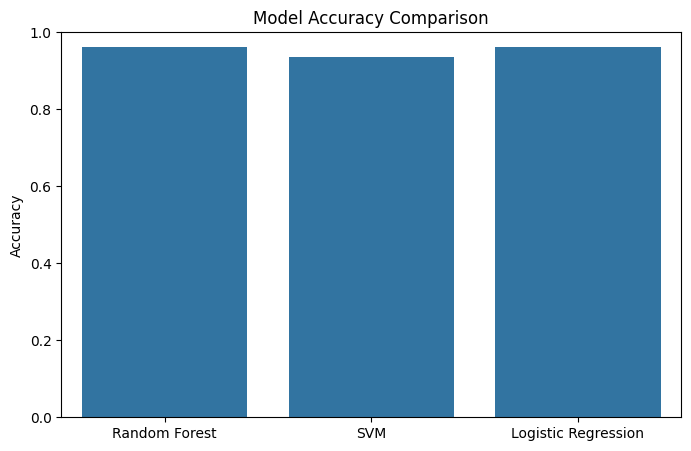


Best model based on accuracy: Random Forest


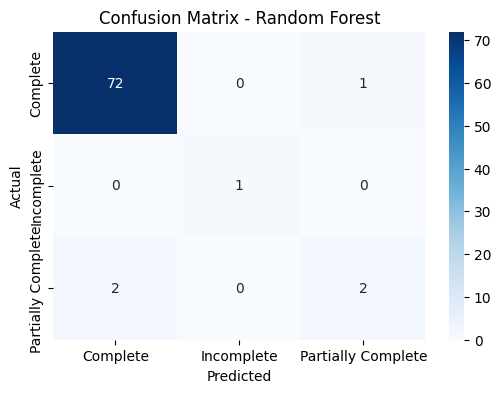

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train and evaluate models
results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)   # Train the model

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {acc:.2f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Save results
    results[model_name] = {
        "model": model,
        "accuracy": acc,
        "report": classification_report(y_test, y_pred, output_dict=True),
        "conf_matrix": confusion_matrix(y_test, y_pred)
    }

# Compare model accuracies visually
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=[res["accuracy"] for res in results.values()])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Confusion Matrix for the best model
best_model = max(results.items(), key=lambda x: x[1]["accuracy"])[0]
print(f"\nBest model based on accuracy: {best_model}")

cm = results[best_model]["conf_matrix"]
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title(f"Confusion Matrix - {best_model}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
